In [17]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import os

In [18]:
# Setting Working Directory
os.chdir('D:')
# Making pandas to show all columns of dataframe
pd.set_option('display.max_columns', None)

In [19]:
with open('D:\Monoxo.json', 'r') as f:
    data = json.load(f)

In [20]:
# Function to convert json file to dataframe


col_names = ['url', 'title', 'description', 'fresh', 'host', 'user_agent', 'content_type', 'org_id', 'user_session_id', 'user_name', 'user_role', 'host_name',
           'ip_address', 'protocol', 'OriginalUrl', 'secure', 'stale', 'xhr', 'isSafe', 'content_length', 'org_id', 'user_session_id']
lis = []
for i in range(len(data)):

    value = data[i]
    comp_data = value['req']
    url  =comp_data['baseUrl']
    title = comp_data['body']['note']['title']
    description =comp_data['body']['note']['desc']
    fresh = comp_data['fresh']
    host = comp_data['headers']['host']
    user_agent = comp_data['headers']['user-agent']
    content_type = comp_data['headers']['content-type']
    org_id = comp_data['headers']['org_id']
    user_session_id = comp_data['headers']['user_session_id']
    user_name = comp_data['headers']['user']['name']
    user_role = comp_data['headers']['user']['role']
    host_name = comp_data['hostname']
    ip_address = comp_data['ip']
    protocol = comp_data['protocol']
    OriginalUrl = comp_data['originalUrl']
    secure = comp_data['secure']
    stale = comp_data['stale']
    xhr = comp_data['xhr']
    isSafe = value['isSafe']
    content_length = comp_data['headers']['content-length']
    org_id = comp_data['headers']['org_id']
    session_id = comp_data['headers']['user_session_id']
    val = (url, title, description, fresh, host, user_agent, content_type, org_id, user_session_id, user_name, user_role, host_name,
           ip_address, protocol, OriginalUrl, secure, stale, xhr, isSafe, content_length, org_id, session_id)
    lis.append(val)
    df_final = pd.DataFrame(lis, columns = col_names)



df_final.head()

,url,title,description,fresh,host,user_agent,content_type,org_id,user_session_id,user_name,user_role,host_name,ip_address,protocol,OriginalUrl,secure,stale,xhr,isSafe,content_length,org_id,user_session_id
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,sam,sales1,example.com,::ffff:117.99.96.244,http,/crm/note,False,True,False,True,70,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,sam,sales1,example.com,::ffff:117.99.96.244,http,/crm/note,False,True,False,True,70,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,sam,sales1,example.com,::ffff:117.99.96.244,http,/crm/note,False,True,False,False,70,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,sam,sales1,example.com,::ffff:117.99.96.244,http,/crm/note,False,True,False,True,70,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,sam,sales1,example.com,::ffff:117.99.96.244,http,/crm/note,False,True,False,False,70,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe


### EDA

In [21]:
#Checking the number of unique value in each column so that we can decide which column to keep and which column to delete.
for i in df_final.columns:
    print('Number of Unique values in {} is {}'.format(i, df_final[i].nunique()))

Number of Unique values in url is 1
Number of Unique values in title is 994
Number of Unique values in description is 750
Number of Unique values in fresh is 1
Number of Unique values in host is 1
Number of Unique values in user_agent is 1
Number of Unique values in content_type is 1
Number of Unique values in org_id is org_id    1
org_id    1
dtype: int64
Number of Unique values in user_session_id is user_session_id    1
user_session_id    1
dtype: int64
Number of Unique values in user_name is 1
Number of Unique values in user_role is 1
Number of Unique values in host_name is 1
Number of Unique values in ip_address is 1
Number of Unique values in protocol is 1
Number of Unique values in OriginalUrl is 1
Number of Unique values in secure is 1
Number of Unique values in stale is 1
Number of Unique values in xhr is 1
Number of Unique values in isSafe is 2
Number of Unique values in content_length is 1
Number of Unique values in org_id is org_id    1
org_id    1
dtype: int64
Number of Uni

### As most of the columns have only one value so they have no variance that is why they don't impart any extra knowledge to our model so we don't need these columns.

In [22]:
df = df_final.copy()

In [23]:
# Dropping columns having number of unique values as 1
for i in df.columns:
    if i not in ['org_id', 'user_session_id']:
        if int(df[i].nunique()) == 1:
            df.drop([i], axis = 1, inplace = True)
        else:
            continue
    else:
        continue
        
df.drop(['org_id', 'user_session_id'], axis = 1, inplace = True)

In [24]:
df.head()

,title,description,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True
1,Clayton Cooper,As possible American many prepare four strong....,True
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False
3,Laura Fisher,State third represent energy campaign not forg...,True
4,Tyler Santos,Us enjoy since. Time identify image position o...,False


<AxesSubplot:>

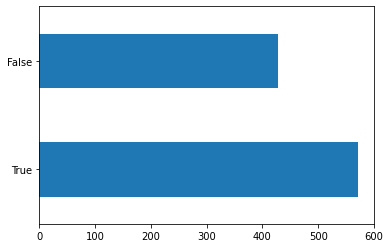

In [25]:
#Checking the distribution of our target variable
df['isSafe'].value_counts().plot(kind = 'barh', )

In [26]:
df['isSafe'].value_counts()

True     572
False    428
Name: isSafe, dtype: int64

### As we can see that there is not much difference in the value count of True and False values. So we can conclude that our data is balanced.

In [27]:
# Sentiment analysis of text in description
vader = SentimentIntensityAnalyzer()
sentiments = []
for i in df.description:
    sent = TextBlob(i)
    sentiments.append(sent.sentiment)

In [28]:
# Adding the Polarity ans Subjectivity columns to out dataframe
polarity = []
subjectivity = []
for i in sentiments:
    polarity.append(i[0])
    subjectivity.append(i[1])
    
df['Polarity'] = np.array(polarity)
df['Subjectivity'] = np.array(subjectivity)

In [29]:
df.head()

,title,description,isSafe,Polarity,Subjectivity
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True,0.106061,0.379167
1,Clayton Cooper,As possible American many prepare four strong....,True,0.233333,0.558333
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,0.000000,0.000000
3,Laura Fisher,State third represent energy campaign not forg...,True,-0.025000,0.325000
4,Tyler Santos,Us enjoy since. Time identify image position o...,False,0.540000,0.440000


In [30]:
# Checking what percentage of values in title are unique
df['title'].nunique()*100/len(df)

99.4

### As almost all the values in title category are different so we will not include it in our final model as this will confuse the model.

In [31]:
df.drop(['title'], axis = 1, inplace = True)

In [32]:
df.head()

,description,isSafe,Polarity,Subjectivity
0,Top recognize eat. Fact whom spend area thing ...,True,0.106061,0.379167
1,As possible American many prepare four strong....,True,0.233333,0.558333
2,Tuesday Notes or 2 like 2 XSP Class,False,0.000000,0.000000
3,State third represent energy campaign not forg...,True,-0.025000,0.325000
4,Us enjoy since. Time identify image position o...,False,0.540000,0.440000


In [33]:
df = pd.get_dummies(df, columns = ['isSafe'], drop_first = True)

In [34]:
df

,description,Polarity,Subjectivity,isSafe_True
0,Top recognize eat. Fact whom spend area thing ...,0.106061,0.379167,1
1,As possible American many prepare four strong....,0.233333,0.558333,1
2,Tuesday Notes or 2 like 2 XSP Class,0.000000,0.000000,0
3,State third represent energy campaign not forg...,-0.025000,0.325000,1
4,Us enjoy since. Time identify image position o...,0.540000,0.440000,0
...,...,...,...,...
995,Recently crime before five thought bit. Card f...,0.000000,0.083333,1
996,"<img src=1 href=1 onerror=""javascript:alert(1)...",0.000000,0.000000,0
997,Set nature they then low resource truth. Edge ...,0.016667,0.275000,1
998,Push case them such face suffer. Letter middle...,0.000000,0.200000,1


### As we have extracted sentiments from the description data, we don't need description any more.

In [35]:
df.drop(['description'], axis = 1, inplace = True)

In [36]:
df.head()

,Polarity,Subjectivity,isSafe_True
0,0.106061,0.379167,1
1,0.233333,0.558333,1
2,0.000000,0.000000,0
3,-0.025000,0.325000,1
4,0.540000,0.440000,0


In [37]:
X = df.drop(['isSafe_True'], axis = 1)
y = df['isSafe_True']

### Model Training

In [38]:
# Doing the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Random Forest Classifier

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 50)]

max_features = ['auto', 'sqrt']

max_depth = [2, 10]

min_samples_split = [2, 5]

bootstrap = [True, False]

In [40]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'bootstrap' : bootstrap}

In [41]:
rf = RandomForestClassifier()

In [42]:
# Performing Hyperparameter Optimization
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = -1)

In [43]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 11, 13, 15, 17, 19, 21, 22, 24,
                                          26, 28, 30, 32, 33, 35, 37, 39, 41,
                                          43, 44, 46, 48, 50, 52, 54, 55, 57,
                                          59, 61, 63, ...]},
             verbose=2)

In [44]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 15}

In [45]:
print('Train Accuracy of Random Forest with Hyperparameter Optimizarion is is {}'.format(rf_grid.score(X_train, y_train)))

print('Test Accuracy of Random Forest with Hyperparameter Optimizarion is is {}'.format(rf_grid.score(X_test, y_test)))

Train Accuracy with Hyperparameter Optimizarion is is 0.79625
Test Accuracy with Hyperparameter Optimizarion is is 0.87


In [46]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
pred = rf_grid.predict(X_test)

In [53]:
confusion_matrix(y_test, pred)

array([[ 62,  24],
       [  2, 112]], dtype=int64)

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf = LogisticRegression()

In [73]:
param_grid_logistic ={'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid_logistic, cv = 5, verbose=True, n_jobs=-1)

In [74]:
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\users\chhav\anaconda3\envs\deeplearning\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [    nan     nan 0.4275      nan 0.5725  0.5725  0.5725  0.5725  0.5725
 0.5725      nan     nan 0.4275      nan 0.545   0.5725  0.5725  0.5725
 0.5725  0.5725      nan     nan 0.4275      nan 0.5725  0.5725  0.5725
 0.5725  0.5725  0.5725      nan     nan 0.4275      nan 0.5725  0.5725
 0.5725  0.5725  0.5725  0.5725      nan     nan 0.4275      nan 0.5425
 0.5725  0.5725  0.5725  0.5725  0.5725      nan     nan 0.4275      nan
 0.5725  0.5725  0.5725  0.5725  0.5725  0.5725      nan     nan 0.7675
     nan 0.5725  0.5725  0.5725  0.57375 0.5725  0.5725      nan     nan
 0.76375     nan 0.7475  0.75125 0.75125 0.7525  0.75125 0.75125     nan
     nan 0.75625     nan 0.75125 0.73875 0.73875 0.745   0.73875 0.73875
     nan     nan 0.75375     nan 0.75375 0.7525  0.7525  0.755   0.75125
 0.7525      nan     nan 0.75125     nan 0

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [75]:
print('Train Accuracy of Logistic with Hyperparameter Optimizarion is is {}'.format(clf_grid.score(X_train, y_train)))

print('Test Accuracy of Logistic with Hyperparameter Optimizarion is is {}'.format(clf_grid.score(X_test, y_test)))

Train Accuracy with Hyperparameter Optimizarion is is 0.7675
Test Accuracy with Hyperparameter Optimizarion is is 0.85


In [76]:
clf_grid.best_params_

{'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}

In [77]:
y_pred_clf = clf_grid.predict(X_test)

In [78]:
confusion_matrix(y_test, y_pred_clf)

array([[ 57,  29],
       [  1, 113]], dtype=int64)

### Support Vector Classifier

In [79]:
from sklearn.svm import SVC

In [80]:
svc = SVC()

In [82]:
params_grid_svc = {'kernel' : ['poly', 'rbf', 'sigmoid'], 'C' : [50, 10, 1.0, 0.1, 0.01], 'gamma' : ['scale']}

In [83]:
svc_grid = GridSearchCV(estimator=svc, param_grid=params_grid_svc, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

In [84]:
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [85]:
print('Train Accuracy of SVC with Hyperparameter Optimizarion is is {}'.format(svc_grid.score(X_train, y_train)))

print('Test Accuracy of SVC with Hyperparameter Optimizarion is is {}'.format(svc_grid.score(X_test, y_test)))

Train Accuracy with Hyperparameter Optimizarion is is 0.8025
Test Accuracy with Hyperparameter Optimizarion is is 0.865


In [87]:
y_pred_svc = svc_grid.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred_svc)

array([[ 62,  24],
       [  3, 111]], dtype=int64)

In [91]:
pip freeze> requirements.txt

Note: you may need to restart the kernel to use updated packages.


### After doing Hyperparameter Optimization and using the Confusion Matrix, we can conclude that Random Forest Classifier is the best.

In [90]:
#Saving the model
filename = 'finalized_model.pkl'
pickle.dump(rf_grid, open(filename, 'wb'))